In [1]:
from utils import *
from matplotlib import pyplot as plt

In [2]:
# 0. Configuration Settings
which_dataset = 1    # 'iris'=0 'crop'=1 'adult'=2 'breast'=3 'nursery'=4 'mushroom'=5

which_model = 0      # 'Decision_Tree' = 0, 'Logistic_Regression = 1', 'Multinomial_Naive_Bayes=2',
                     # 'K_Nearest_Neeighbor = 3', 'Random_Forest = 4', 'Multilayer_Perceptron = 5'

explanation_tool = 1 # 'Lime=0' 'Shap=1'

In [12]:
# This is the number of auxiliary datasets to experiment on. 
# Lower the number for a lower runtime.
how_many_sets = 10

# Size of auxiliary dataset (per class) in a list format (n in the paper) 
sample_set_sizes = [1,2,3,4,5]

# Number of features explored in a list format (k in the paper)
nfe = [3] 

query_limit = [1000]

attack_mode = 0  # 0: auto, 1: pre-existing fast, 2: pre-existing slow  

In [13]:
# Set the last parameter True for saving the results
if attack_mode == 0:
    accuracies, rtest_sims, samples_mega, other_args = run_attack_auto(which_dataset, which_model, explanation_tool, 
                                                                       how_many_sets, sample_set_sizes, nfe, query_limit, False)
elif attack_mode == 1:
    accuracies, rtest_sims, samples_mega, other_args = run_attack_prepared(True)
elif attack_mode == 2:
    accuracies, rtest_sims, samples_mega, other_args = run_attack_prepared(False)
else:
    print('Incorrect attack type! Select 0, 1 or 2 as your attack mode.')

Train results
[[75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 75  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 75  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 75  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 75  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 75  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 75  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 75  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 75  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 75  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 75  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 75  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 75]]
              precision    recall  f1-score   support

           0

Dataset:   Crop
ML Model:  Decision Tree
SHAP is the explanation tool currently in use

Lower bounds:  [12]  Upper bounds:  [1033] (per class for both)

-----The attack starts here!-----

Number of top features allowed to be explored (k): 3

Number of samples per class (n): 1
Sample set 0 , n_queries = 34 , Top similarity = 0.4392
Sample set 1 , n_queries = 34 , Top similarity = 0.4039
Sample set 2 , n_queries = 34 , Top similarity = 0.2078
Sample set 3 , n_queries = 34 , Top similarity = 0.4
Sample set 4 , n_queries = 34 , Top similarity = 0.4431
Sample set 5 , n_queries = 34 , Top similarity = 0.4275
Sample set 6 , n_queries = 34 , Top similarity = 0.4275
Sample set 7 , n_queries = 34 , Top similarity = 0.4353
Sample set 8 , n_queries = 34 , Top similarity = 0.1569
Sample set 9 , n_queries = 34 , Top similarity = 0.4627
Accuracy:  [0.4353, 0.4, 0.3765, 0.4039, 0.4392, 0.4235, 0.4275, 0.4275, 0.2392, 0.4588] 
Similarity:  [0.4392, 0.4039, 0.2078, 0.4, 0.4431, 0.4275, 0.4275, 0.4353, 0

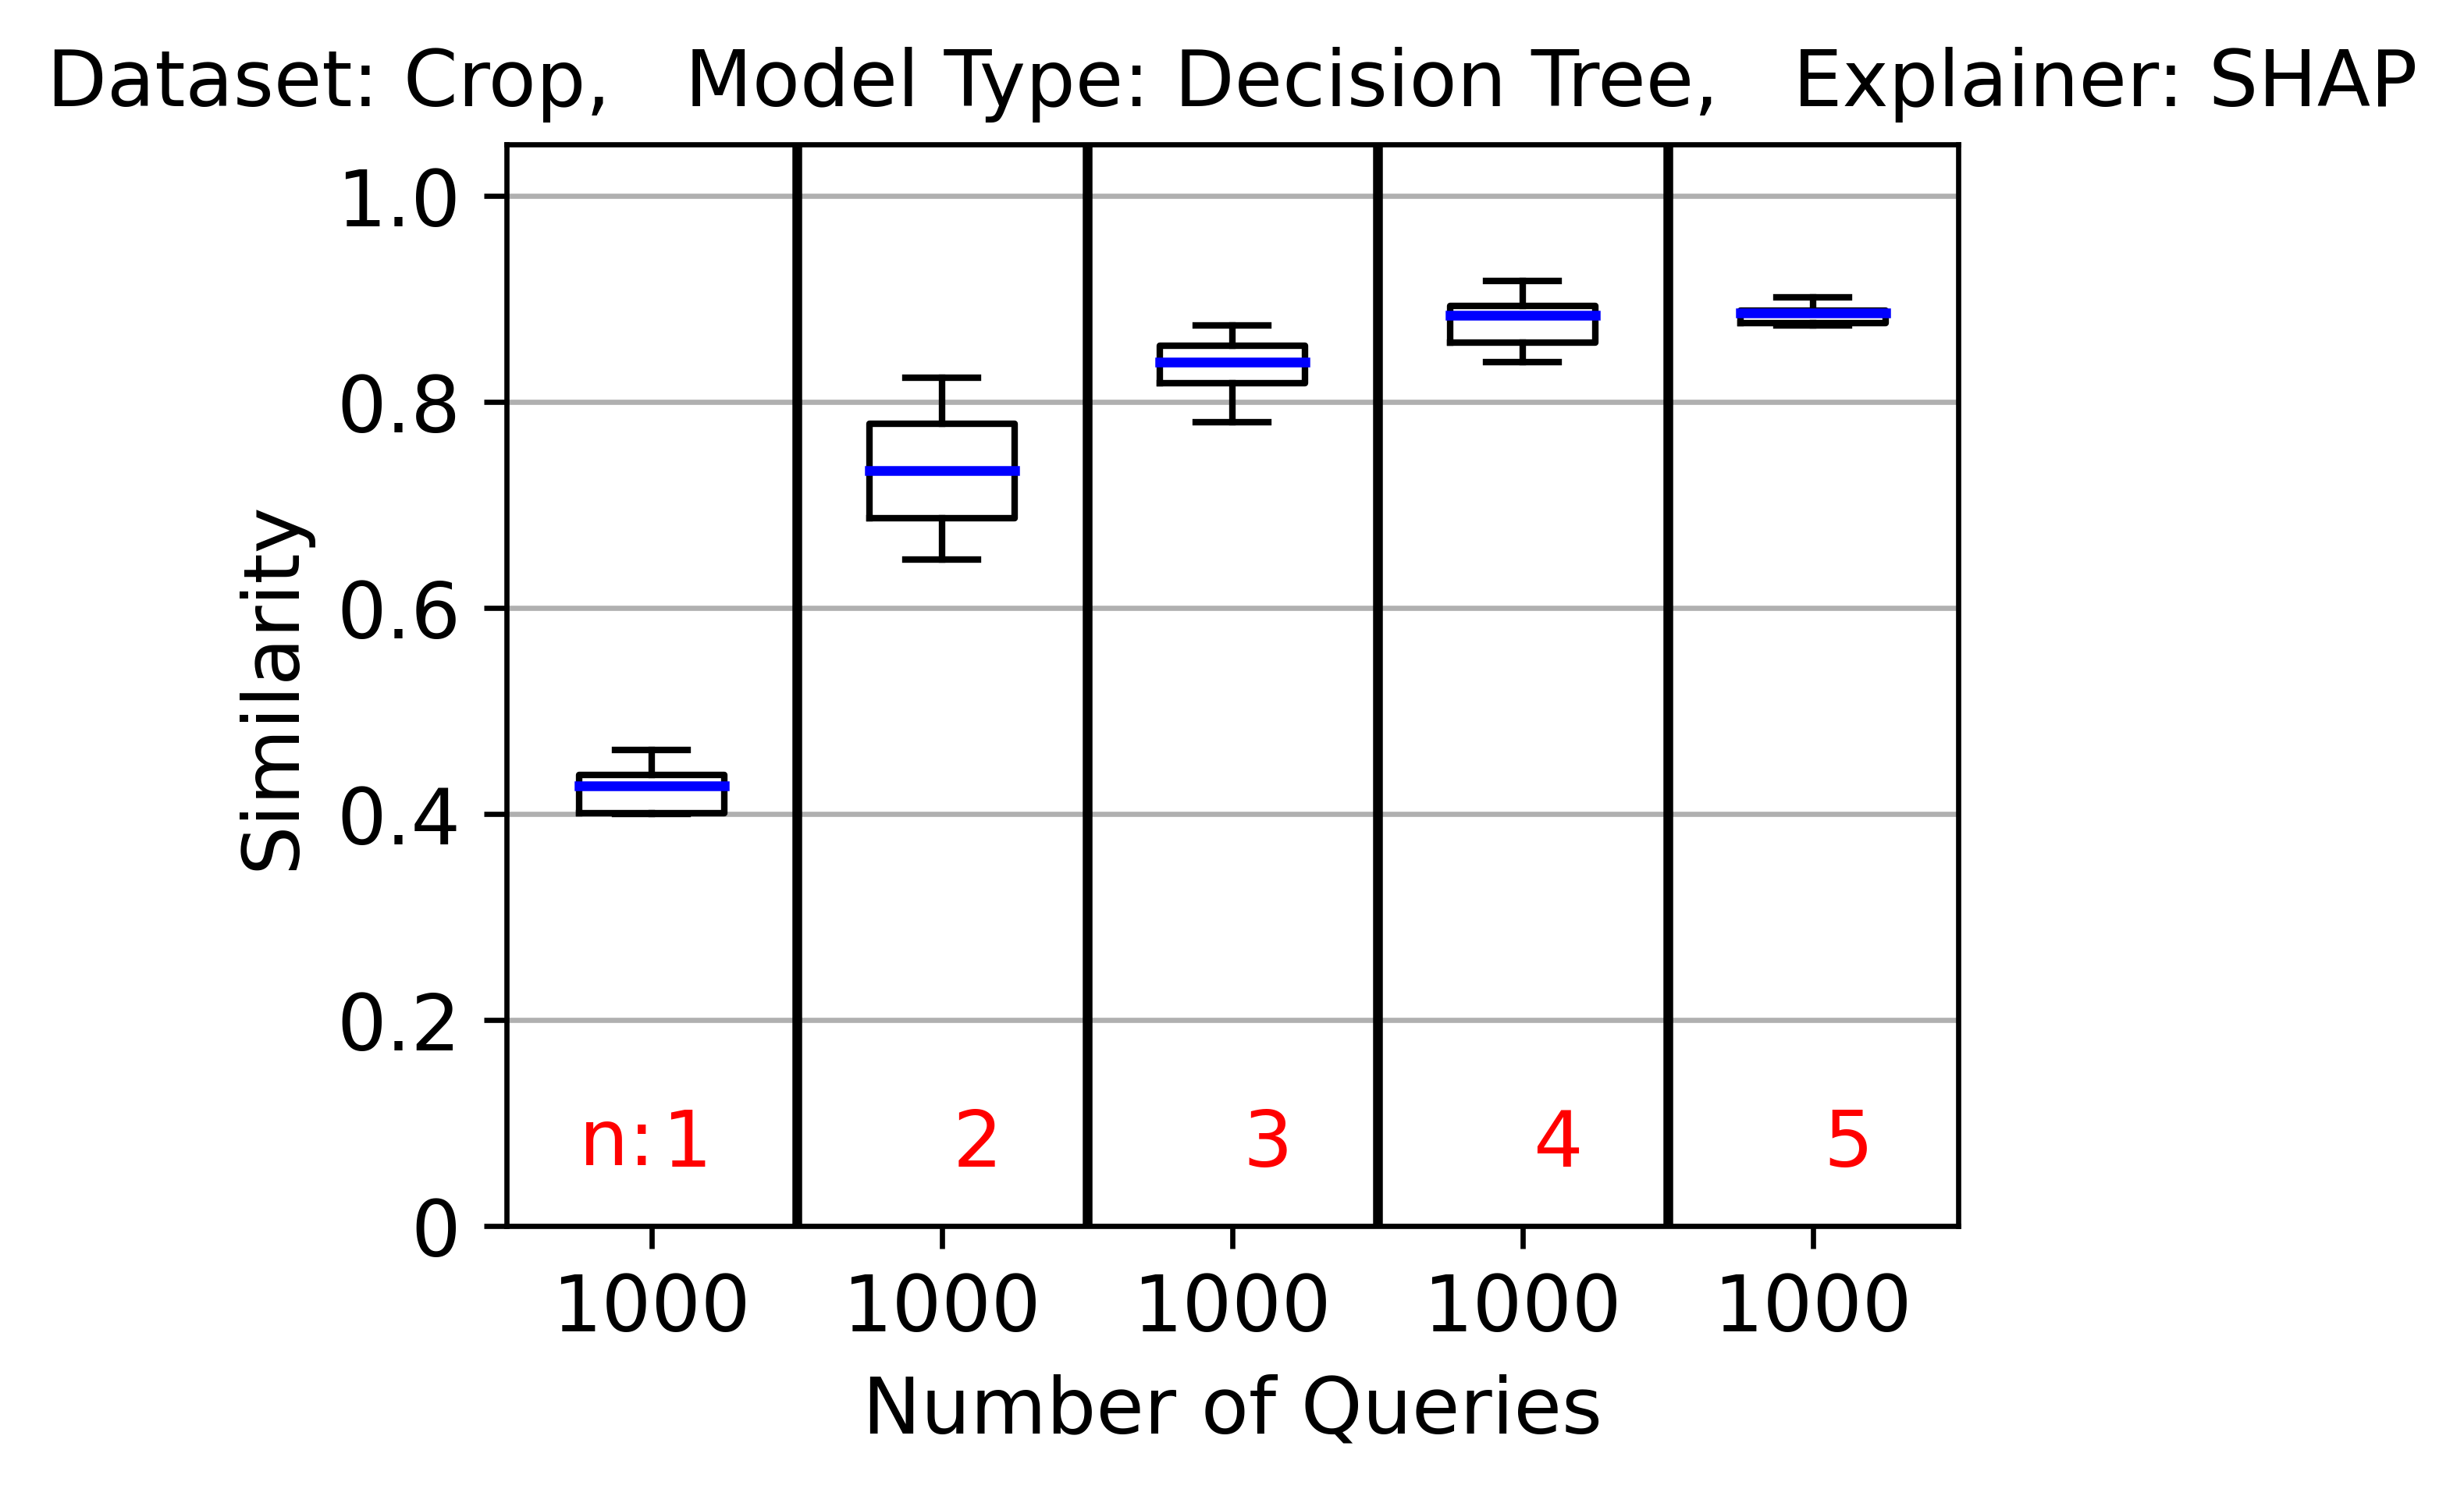

In [14]:
isSim = True # Change this to False for plotting accuracy and True for plotting similarity

x_axis = []
y_axis = [0,0.2,0.4,0.6,0.8,1.0]
dataset_dict, model_dict, exp_dict = load_experiment_dicts()
n = len(sample_set_sizes)
q = len(query_limit)
for i in range(n):
    x_axis += query_limit
tmp = n*q
plt.rcParams['figure.dpi'] = 600
plt.rcParams['savefig.dpi'] = 600
fig, ax = plt.subplots(figsize=(tmp*0.6+1, 3))
plt.title('Dataset: '+dataset_dict.get(which_dataset)+
          ',   Model Type: '+model_dict.get(which_model)+
          ',   Explainer: '+exp_dict.get(explanation_tool), color='black')
medianprops = dict(linewidth=1.5, color='blue')
if isSim:
    ax.boxplot(rtest_sims,0,'',medianprops=medianprops)
else:
    ax.boxplot(accuracies,0,'',medianprops=medianprops)
ax.yaxis.grid(True)
ax.set_xticklabels(x_axis)
if not isSim:
    plt.axhline(y = t_accuracy, color = 'green')
for i in range(n-1):
    plt.axvline(x = q*(i+1)+0.5, color = 'black')

label = 'Sample size (per class): '
label = 'n: '
plt.annotate(label, 
             (0.75,0.06), 
             textcoords="offset points", # how to position the text
             xytext=(0,0), # distance from text to points (x,y)
             ha='left', fontsize=12, color='red')
for x in range(n):
    label = str(sample_set_sizes[x])
    plt.annotate(label, # this is the text
                 (q*(x+1)+0.1,0.05), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(1,1.3), # distance from text to points (x,y)
                 ha='center', fontsize=12, color='red')
ax.set_ylim(0,1.05)
ax.set_xticklabels(x_axis,fontsize=12)
ax.set_yticklabels(y_axis,fontsize=12)
ax.set_xlabel('Number of Queries', fontsize=12)
if isSim:
    ax.set_ylabel('Similarity', fontsize=12)
else:
    ax.set_ylabel('Accuracy', fontsize=12)
plt.show()